In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()



False

In [2]:
import os
from typing import TypedDict, List

from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image
from langgraph.graph import StateGraph, END

from dotenv import load_dotenv

In [3]:
class State(TypedDict):
    text: str
    proc_symbol_table: str
    updated_code:str
    functions:str
    java_symbol_table: str
    conversion_score: int

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [4]:
def identify_pro_c_symbol_table(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["text"],
        template='''you are an expert in pro*c, Given pro*c :{text}, you have identify symbol table out of pro*c. Capture
        all keywords, variables and every detail of pro*c into symbol table. '''
    )
    message = HumanMessage(content=prompt.format(text=state["text"]))
    proc_symbol_table = llm.invoke([message]).content.strip()
    return {"proc_symbol_table": proc_symbol_table}

In [5]:
def convert_to_java(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["text",'proc_symbol_table'],
        template='''you are a pro*c to java converter, Given pro*c :{text}, translate it into java language.you are also
        provided with pro*c symbol table for your referece:{proc_symbol_table}
         As you translate,
        you do not need to add any other information. Just need executable java code in the output. Nothing else'''
    )
    message = HumanMessage(content=prompt.format(text=state["text"],proc_symbol_table=state['proc_symbol_table']))
    updated_code = llm.invoke([message]).content.strip()
    with open("converted_java_code.txt", "w") as file:
        file.write(updated_code)
    print(updated_code)
    return {"updated_code": updated_code}

In [6]:
def identify_symbol_table_java(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["updated_code"],
        template='''you are an expert in java language, given java code:{updated_code}, you will have to identify the symbol
        table of java.Capture all keywords, variables and every detail of java into symbol table.
        This symbol table will later be used to be compared against a different language symbol table.
         So double check the symbol table
        '''
    )
    message = HumanMessage(content=prompt.format(updated_code=state["updated_code"]))
    java_symbol_table = llm.invoke([message]).content.strip()
    return {"java_symbol_table": java_symbol_table}

In [7]:
def compare_symbol_table(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["java_symbol_table","proc_symbol_table"],
        template='''you are an expert of both java and pro_c. yoy are provided with both pro*c symbol table {proc_symbol_table} and
        java symbol table {java_symbol_table}. you need to validate translation from pro*c to java
        you will have to score it on the scale of 10
        '''
    )
    message = HumanMessage(content=prompt.format(proc_symbol_table=state["proc_symbol_table"],java_symbol_table=state["java_symbol_table"]))
    conversion_score = llm.invoke([message]).content.strip()
    return {"conversion_score": conversion_score}

In [8]:
def identify_symbol_table_java(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["updated_code"],
        template='''you are an expert in java language, given java code:{updated_code}, you will have to identify the symbol
        table of java.Capture all keywords, variables and every detail of java into symbol table.
        This symbol table will later be used to be compared against a different language symbol table.
         So double check the symbol table. whule you make symbol table, do not add any additional text at bottom and start of table
        '''
    )
    message = HumanMessage(content=prompt.format(updated_code=state["updated_code"]))
    java_symbol_table = llm.invoke([message]).content.strip()
    return {"java_symbol_table": java_symbol_table}

In [9]:
workflow = StateGraph(State)

# Add nodes to the graph
workflow.add_node("identify_pro_c_symbol_table", identify_pro_c_symbol_table)
workflow.add_node("convert_to_java", convert_to_java)
workflow.add_node("identify_symbol_table_java", identify_symbol_table_java)
workflow.add_node("compare_symbol_table", compare_symbol_table)


# Add edges to the graph
workflow.set_entry_point("identify_pro_c_symbol_table")
workflow.add_edge("identify_pro_c_symbol_table", "convert_to_java")
workflow.add_edge("convert_to_java", "identify_symbol_table_java")
workflow.add_edge("identify_symbol_table_java", "compare_symbol_table") # Set the entry point of the graph
workflow.add_edge("compare_symbol_table", END)


# Compile the graph
app = workflow.compile()

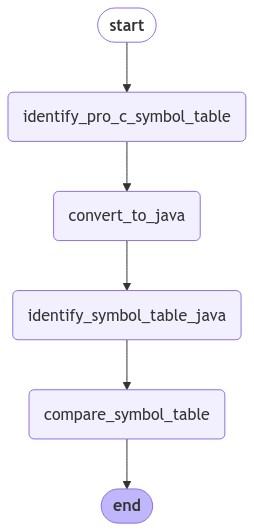

In [10]:

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [11]:
sample_pro_c="""#include <sqlca.h>

EXEC SQL BEGIN DECLARE SECTION;
    char name[50];
    int age;
EXEC SQL END DECLARE SECTION;

int main() {
    EXEC SQL CONNECT :user/:password;

    EXEC SQL DECLARE emp_cursor CURSOR FOR emp_query;
    EXEC SQL OPEN emp_cursor;
    EXEC SQL FETCH emp_cursor INTO :name, :age;

    while (sqlca.sqlcode == 0) {
        printf("Name: %s, Age: %d\n", name, age);
        EXEC SQL FETCH emp_cursor INTO :name, :age;
    }

    EXEC SQL CLOSE emp_cursor;
    EXEC SQL COMMIT;
    EXEC SQL DISCONNECT;

    return 0;
}
"""

In [12]:
sample_text = """
OpenAI has announced the GPT-4 model, which is a large multimodal model that exhibits human-level performance on various professional benchmarks. It is developed to improve the alignment and safety of AI systems.
additionally, the model is designed to be more efficient and scalable than its predecessor, GPT-3. The GPT-4 model is expected to be released in the coming months and will be available to the public for research and development purposes.
"""
comment='change GPT-4 to GPT-6'
state_input = {"text": sample_pro_c}
result = app.invoke(state_input)
print(result)

print("tone:", result["updated_code"])
#print("Classification:", result["classification"])
#print("\nEntities:", result["entities"])
#print("\nSummary:", result["summary"])

```java
import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.PreparedStatement;
import java.sql.ResultSet;

public class EmployeeFetcher {
    public static void main(String[] args) {
        String user = "your_username"; // Replace with actual username
        String password = "your_password"; // Replace with actual password
        String empQuery = "SELECT name, age FROM employees"; // Replace with actual SQL query

        try {
            Connection connection = DriverManager.getConnection("jdbc:your_database_url", user, password);
            PreparedStatement preparedStatement = connection.prepareStatement(empQuery);
            ResultSet resultSet = preparedStatement.executeQuery();

            while (resultSet.next()) {
                String name = resultSet.getString("name");
                int age = resultSet.getInt("age");
                System.out.printf("Name: %s, Age: %d%n", name, age);
            }

            resultSet.close();
          

In [108]:
result['conversion_score']

"To validate the translation from Pro*C to Java, we need to assess how well the Java symbol table captures the functionality and structure of the Pro*C code. Here are the key points to consider:\n\n1. **Keywords and Syntax**: \n   - The Pro*C keywords (like `EXEC SQL`, `DECLARE`, `CURSOR`, etc.) are specific to SQL embedded in C, while Java uses its own set of keywords (like `import`, `public`, `class`, etc.). The Java symbol table correctly identifies Java keywords, but it does not have direct equivalents for Pro*C keywords, which is expected due to the differences in the languages.\n\n2. **Variable Mapping**:\n   - The variables in Pro*C (like `name`, `age`, `user`, `password`) are correctly represented in Java. The Java symbol table also includes similar variables, which is good. However, the Pro*C variables are used in a database context, while the Java variables are more general. The mapping is appropriate, but the context of usage should be noted.\n\n3. **SQL Handling**:\n   - Pr

In [109]:
result['java_symbol_table']

'| Symbol Type      | Symbol Name               | Description                                      |\n|------------------|---------------------------|--------------------------------------------------|\n| Keyword          | import                    | Imports a package or class                       |\n| Keyword          | public                    | Access modifier for classes and methods          |\n| Keyword          | class                     | Declares a class                                 |\n| Keyword          | static                    | Indicates that a method or variable belongs to the class, not instances |\n| Keyword          | void                      | Specifies that a method does not return a value  |\n| Keyword          | main                      | Main method, entry point of the program          |\n| Keyword          | String                    | Class representing a sequence of characters      |\n| Keyword          | int                       | Primitive data typ